# Question 1

**Assuming Grayscale Images!**

Code for NCC:

In [43]:
import numpy as np
import scipy as sp

In [148]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

# No need for padding here. This is to be used only for tempplate matching
# Neighborhood is pixels to the right
# This makes it simpler in case of rectangular kernel. 

def my_ncc(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    k2 = (int(kernel.shape[1]/2))
    im_out = np.zeros(im_in.shape)
    
    # padding
    
    for i in range(0, im_in.shape[0]-kernel.shape[0]):
        for j in range(0, im_in.shape[1]-kernel.shape[1]):
                        
            p_sum = 0
            
#             b = []
            
#             for ii in range(-k, k+1):
#                 for jj in range(-k, k+1):
#                     i_idx = i+ii
#                     j_idx = j+jj
#                     if (i_idx) < 0 or (i_idx) >=im_in.shape[0] or j_idx < 0 or (j_idx) >=im_in.shape[0]:
#                         b.append(0)
#                     else:
#                         b.append(im_in[i+ii][j+jj])
            
            
            
            # if remove padding then need to change im_out indices here to i, j
            sec = im_in[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            ncc_mean = np.mean(sec)
            ncc_std = np.std(sec)
            
            if ncc_std == 0:
                ncc_std = 1
            
            im_out[i][j] = np.sum(np.multiply(kernel, (sec-ncc_mean)/ncc_std))
            
            
    
    return im_out

In [107]:

my_ncc(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

array([[2., 3., 0., 0., 0.],
       [2., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## (B)

(21, 22)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

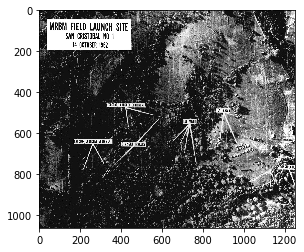

In [149]:
import matplotlib.pyplot as plt
q1_b_in = plt.imread('u2cuba.jpg')
q1_b_t = plt.imread('trailer.png')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

print(rgb2gray(q1_b_t).shape)

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)

plt.imshow(q1_b_in, cmap='gray')
plt.plot

In [141]:
# a = np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
# a= np.pad(a, [1], 'constant', constant_values=[0,8])
# print(a)

In [142]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)


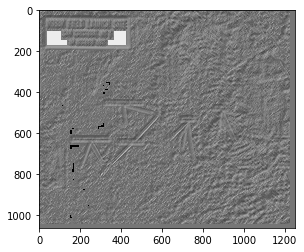

In [143]:
plt.imshow(q1_b_out, cmap='gray')

## (C)

In [150]:
q1_b_t = plt.imread('trailerSlightlyBigger.png')
q1_b_in = plt.imread('u2cuba.jpg')

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)


In [151]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)

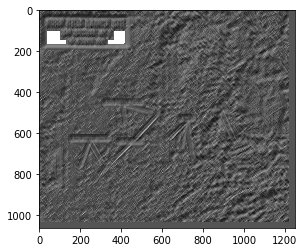

In [154]:
plt.imshow(q1_b_out, cmap='gray')

# Question 2

The input image is padded with '0' pixels as necessary

In [2]:
import numpy as np

In [9]:
# a = np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
# a= np.pad(a, [3,3], 'constant', constant_values=[0,0])
# print(a)



[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 3 4 5 0 0 0]
 [0 0 0 1 2 3 4 5 0 0 0]
 [0 0 0 1 2 3 4 5 0 0 0]
 [0 0 0 1 2 3 4 5 0 0 0]
 [0 0 0 1 2 3 4 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

In [16]:
# 
# Assuming an ODD x ODD Kernel
# Arguments: 2 np (matrices)
def my_conv2d(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    
    im_out = np.zeros(im_in.shape)
    
    lim = im_in.shape[0]
    
    print(im_in)
    
    im_in = my_pad(im_in, k, k)
    
    print(im_in)
    
    
    for i in range(k, lim+k):
        for j in range(k, lim+k):
            #p_sum = 0
            
            sec = im_in[i-k:i+k+1, j-k:j+k+1]
            
            im_out[i][j] = np.sum(np.multiply(kernel, sec))
            
#             for ii in range(-k, k+1):
#                 for jj in range(-k, k+1):
#                     i_idx = i-ii
#                     j_idx = j-jj
                    
#                     # Result is padding the image with 0 pixels
#                     if (i_idx) < 0 or (i_idx) >=im_in.shape[0] or j_idx < 0 or (j_idx) >=im_in.shape[0]:
#                         continue
#                     p_sum += kernel[k+ii][k+jj]*im_in[i-ii][j-jj]
            
#             im_out[i][j] = p_sum
    
    return im_out
    


In [17]:
my_conv2d(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[0 0 0 0 0 0 0]
 [0 1 2 3 4 5 0]
 [0 1 2 3 4 5 0]
 [0 1 2 3 4 5 0]
 [0 1 2 3 4 5 0]
 [0 1 2 3 4 5 0]
 [0 0 0 0 0 0 0]]


IndexError: index 5 is out of bounds for axis 0 with size 5